## Telecom Company Account Churns

### Description

Customer attrition is one of the problems that effect business of a Telecom Company. The company needs to find solution to address this problem. One of the most effective ways is to make prediction on potential customer churns, and then conduct some follow-ups or inquiries with these customers, in the aim at solving the problem preactively.
<br>Telecom company has customer account data that contains both customer demographic and account information. The data has total 7043 rows, each row contains a customer information presented in 21 columns shown below. 
<br>We'll perform data preprocessing and analysis before building predictive models. In model build stage, several basic predictive models and ensembled models are built and evaluated with given dataset. Model that has highest predictive accuracy score on evaluation data will be selected as the final predictive model for house evaluation. In addition, features that impact the house price the most will be extracted and analyzed.

|No|Variables|Description|
|:--|:--------|:-----------|
|1|customerID|Customer ID|
|2|gender|Whether the customer is a male or a female|
|3|SeniorCitizen|senior citizen or not (1, 0)|
|4|Partner|Whether the customer has a partner or not (Yes, No)|
|5|Dependents|Whether the customer has a dependent or not (Yes, No)|
|6|tenure|Number of months the customer has stayed with the company|
|7|PhoneService| Whether the customer has a phone service or not (Yes, No)|
|8|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|9| InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|0| OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service)|
|11| OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|12| DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|13|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|14|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service)|
|15|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|16|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|17|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|18|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|19|MonthlyCharges|The amount charged to the customer monthly|
|20|TotalCharges|The total amount charged to the customer|
|21|Churn |Whether the customer churned or not (Yes or No)|

### Data Preprocessing

Data file 'telco_o.csv' was read in as input pandas DataFrame for analysis. The dataset has 7043 records and 21 columns. Each column presents attributes of the one telecom company customer account.
<br>Data preprocessing stage involves handling missing values in dataset, creating new features and removing irrelevant and duplicated features. <br>Missing values occurs in columns 'DeviceProtection' and 'TechSupport'. We replaced missing values with most frequetly occured value in the group. <br>Categorical variables that have 2 levels or have implicit order are mapped to numeric values. For other categorical variables, we created dummy variables for each such column. <br>Columns 'customerID', 'Unnamed: 0' were removed to clean irelevance and duplicates. <br>After all above process, we got a clean dataset for analysis and model building.

### Predictive Models

Three types of ensembled model techinques and Neural Network model were exercised to fit predictive models. 
- Voting: Hard Voting and Soft Voting with Logistic Regression, KNN, LinearSVC, SVC_poly, SVC_rbf and Decision Tree as base models  
- Bagging: Bagging with KNN, Decision Tree as base models. Pasting with Logistic Regression and LinearSVC as base models
- Boosting: AdaBoosting with Decision Tree and Logistic Regression as base models. GradientBoosting model was also fitted to find the best models.
- Neural Network: A sequential deep learning model

<br>Model selection was performed by calling GridSearchCV API with specified tuning paramter grid. 5-fold Cross Validation was performed on training dataset to fit each model. Accuracy score is the performance metrics for model selection. Final predictive model is the model that generates highest prediction accuracy score on test dataset.

### Results

[Predictive Model Results](#Predictive-Model-Results)
<br>[Feature Importance](#Feature-Importance)

- Final Model
<br>Among all the fitted models, Gradient Boosting classifier performs the best on given test dataset. The model generates highest test accuracy score of 0.807. Hyperparamter for the model is 'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 100.


- Feature Importance
<br>From our feature importance analysis result shown in attached link, customer contract type has the most significant influence on customer churn status. Influence from tenure of customer staying with telecom company follows contract type. Whether or not a customer using ITS_Fiber optic rank 3rd in significance.

### Code

#### Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
telco = pd.read_csv("data/telco_o.csv", na_values=['?', ' '])
telco.info()
telco.describe()
#telco.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        6845 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  6761 non-null   object 
 13  TechSupport       6722 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000
mean,3521.000000,0.162147,32.371149,64.761692,2283.300441
std,2033.283305,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,0.000000,18.250000,18.800000
25%,1760.500000,0.000000,9.000000,35.500000,401.450000
50%,3521.000000,0.000000,29.000000,70.350000,1397.475000
75%,5281.500000,0.000000,55.000000,89.850000,3794.737500
max,7042.000000,1.000000,72.000000,118.750000,8684.800000


#### - Check and handle missing values
- Fill missing values in 'DeviceProtection' and 'TechSupport' with value occurs the most in each group of the column

In [3]:
telco.columns[telco.isnull().sum()>0]

Index(['Dependents', 'DeviceProtection', 'TechSupport', 'TotalCharges'], dtype='object')

In [4]:
telco.drop(['customerID', 'Unnamed: 0'], axis=1, inplace=True)


grps = telco.groupby(['Contract', 'MultipleLines'])
telco['DeviceProtection'] = grps['DeviceProtection'].transform(lambda grp: grp.fillna(grp.value_counts().index[0]))

grps = telco.groupby(['MultipleLines'])
telco['TechSupport'] = grps['TechSupport'].transform(lambda grp: grp.fillna(grp.value_counts().index[0]))

telco.dropna(inplace=True)

#### Convert categorical features to numerics
1. For category columns having 2 levels, binary mapping columns
2. For category columns with 3 levels having implict orders, mapping columns to numbers 0, 1, 2
3. For Nominal category columns, generate dummy variables for each column

In [5]:
telco["Churn"] = telco["Churn"].map({"No":0, "Yes":1}).astype(int)
telco['gender'] = telco['gender'].map({"Female": 0, "Male":1}).astype(int)
telco["Partner"] = telco["Partner"].map({"Yes": 1, "No": 0}).astype(int)
telco['PhoneService'] = telco['PhoneService'].map({"Yes":1, "No":0}).astype(int)
telco["Dependents"] = telco["Dependents"].map({"Yes": 1, "No": 0}, na_action='ignore').astype(int)

In [6]:
telco["MultipleLines"] = telco["MultipleLines"].map({"No phone service":0, "No":1, "Yes":2}).astype(int)
telco["OnlineSecurity"] = telco["OnlineSecurity"].map({"No internet service":0, "No":1, "Yes":2}).astype(int)
telco["OnlineBackup"] = telco["OnlineBackup"].map({"No internet service":0, "No":1, "Yes":2}).astype(int)
telco["StreamingMovies"] = telco["StreamingMovies"].map({"No internet service":0, "No":1, "Yes":2}).astype(int)
telco['StreamingTV'] = telco['StreamingTV'].map({"No internet service":0, "No":1, "Yes":2}).astype(int)
telco["PaperlessBilling"] = telco["PaperlessBilling"].map({"No":0, "Yes":1}).astype(int)
telco['DeviceProtection'] = telco['DeviceProtection'].map({'No internet service':0, "No":1, "Yes":2}).astype(int)
telco['TechSupport'] = telco['TechSupport'].map({'No internet service':0, 'No':1, 'Yes':2}).astype(int)
telco['Contract'] = telco['Contract'].map({'Month-to-month':0, 'One year':1, 'Two year':2}).astype(int)

In [7]:
its_dummy = pd.get_dummies(telco['InternetService'], columns='InternetService', prefix='ITS') 
telco = pd.concat([telco, its_dummy], axis=1)
telco.drop(['InternetService'], axis=1, inplace=True)

payment_dummy = pd.get_dummies(telco['PaymentMethod'], columns='PaymentMethod', prefix='Payment')
telco = pd.concat([telco, payment_dummy], axis=1)
telco.drop(['PaymentMethod'], axis=1, inplace=True)

#### Now we have a clean data frame without missing values and all features have numeric value type

In [8]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6834 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             6834 non-null   int32  
 1   SeniorCitizen                      6834 non-null   int64  
 2   Partner                            6834 non-null   int32  
 3   Dependents                         6834 non-null   int32  
 4   tenure                             6834 non-null   int64  
 5   PhoneService                       6834 non-null   int32  
 6   MultipleLines                      6834 non-null   int32  
 7   OnlineSecurity                     6834 non-null   int32  
 8   OnlineBackup                       6834 non-null   int32  
 9   DeviceProtection                   6834 non-null   int32  
 10  TechSupport                        6834 non-null   int32  
 11  StreamingTV                        6834 non-null   int32

###  Data Partition to Train and Test Datasets

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y = telco['Churn']
X = telco.drop(['Churn'], axis = 1)

In [11]:
X_train_full, X_test_org, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [12]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_full)
X_test = scaler.transform(X_test_org)
print("train dataset size: ", X_train.shape, "\ntest dataset size: ", X_test.shape)

train dataset size:  (5467, 24) 
test dataset size:  (1367, 24)


In [13]:
model_Scores = []

## Basic Classification Models

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [24]:
# Logistic Regression
lgr_clf = LogisticRegression(penalty='l2')
param_lgr = {'C': [0.1, 0.5, 1, 10]}
# KNN
knn_clf = KNeighborsClassifier()
param_knn = {'n_neighbors': [1, 3, 5, 7, 10]}
# Linear SVM
lsvc_clf = SVC(kernel='linear', probability=True)
param_lsvc = {'C': [0.01, 0.1, 1, 10]}
# PolynomialSVC
psvc_clf = SVC(kernel='poly', probability=True)
param_psvc = {'C': [0.01, 0.1, 1], 'degree':[1, 2, 3]}
# rbfSVC
rsvc_clf = SVC(kernel='rbf', probability=True)
param_rsvc = {'C': [0.01, 0.1, 1], 'gamma':[0.001, 0.01, 0.1, 0.3]}
# Decsion Tree
dt_clf = DecisionTreeClassifier()
param_dt = {'max_depth': [1, 3, 5, 7, 9]}

best_models = []
for clf, param, label in zip([lgr_clf, knn_clf, lsvc_clf, psvc_clf, rsvc_clf, dt_clf],
                       [param_lgr, param_knn, param_lsvc, param_psvc, param_rsvc, param_dt],
                             ['lr', 'knn', 'lsvc', 'psvc', 'rsvc', 'dtree']):
    grid = GridSearchCV(clf, param_grid=param, n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models.append((label, grid.best_estimator_))
    print('Best model: {} with params: {} \ntrain score: {:.4f}'.format(grid.best_estimator_, grid.best_params_, grid.best_score_))
    print('Test score: {:.4f}'.format(grid.best_estimator_.score(X_test, y_test)))
best_models

Best model: LogisticRegression(C=1) with params: {'C': 1} 
train score: 0.8032
Test score: 0.8010
Best model: KNeighborsClassifier(n_neighbors=10) with params: {'n_neighbors': 10} 
train score: 0.7759
Test score: 0.7652
Best model: SVC(C=0.1, kernel='linear', probability=True) with params: {'C': 0.1} 
train score: 0.8006
Test score: 0.7922
Best model: SVC(C=1, degree=1, kernel='poly', probability=True) with params: {'C': 1, 'degree': 1} 
train score: 0.8006
Test score: 0.7922
Best model: SVC(C=1, gamma=0.3, probability=True) with params: {'C': 1, 'gamma': 0.3} 
train score: 0.7984
Test score: 0.7871
Best model: DecisionTreeClassifier(max_depth=3) with params: {'max_depth': 3} 
train score: 0.7911
Test score: 0.7805


[('lr', LogisticRegression(C=1)),
 ('knn', KNeighborsClassifier(n_neighbors=10)),
 ('lsvc', SVC(C=0.1, kernel='linear', probability=True)),
 ('psvc', SVC(C=1, degree=1, kernel='poly', probability=True)),
 ('rsvc', SVC(C=1, gamma=0.3, probability=True)),
 ('dtree', DecisionTreeClassifier(max_depth=3))]

## Apply two voting classifiers (Hard & Soft)

### 1. Voting Classifiers (Hard)

In [25]:
voting_hard = VotingClassifier(estimators=best_models,
                               voting='hard')
voting_hard.fit(X_train, y_train)
print(voting_hard.__class__.__name__)
print('Train score: {:.4f}'.format(voting_hard.score(X_train, y_train)))
print('Test score: {:.4f}'.format(voting_hard.score(X_test, y_test)))

VotingClassifier
Train score: 0.8083
Test score: 0.7937


In [26]:
model_Scores.append({'Model Type':'Classification',
                    'Model Name': 'Hard Voting Classifiers',
                    'Best Parameters': voting_hard.get_params(),
                    'Train Score': voting_hard.score(X_train, y_train),
                    'Test Score': voting_hard.score(X_test, y_test)})

### 2. Voting Classifier (Soft)

In [27]:
voting_soft = VotingClassifier(estimators=best_models, voting='soft')
voting_soft.fit(X_train, y_train)

print(voting_soft.__class__.__name__)
print('Train score: {:.4f}'.format(voting_soft.score(X_train, y_train)))
print('Test score: {:.4f}'.format(voting_soft.score(X_test, y_test)))

VotingClassifier
Train score: 0.8125
Test score: 0.7922


In [28]:
model_Scores.append({'Model Type':'Classification',
                    'Model Name': 'Soft Voting Classifiers',
                    'Best Parameters': voting_soft.get_params(),
                    'Train Score': voting_soft.score(X_train, y_train),
                    'Test Score': voting_soft.score(X_test, y_test)})

## Apply two models with bagging and two models with pasting.

### 1. Bagging with KNN as base model(k=5)

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.metrics import accuracy_score

In [30]:
knn_clf = KNeighborsClassifier(10)
knn_clf.fit(X_train, y_train)

param1 = {
    'n_estimators': [50, 100, 200], 
    'max_samples':[0.5, 0.7]
}

bag_knn = BaggingClassifier(knn_clf, bootstrap=True, random_state=0)
grid_bagKNN = GridSearchCV(bag_knn, param1, cv = 5, n_jobs = -1, return_train_score= True)
grid_bagKNN.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=10),
                                         random_state=0),
             n_jobs=-1,
             param_grid={'max_samples': [0.5, 0.7],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True)

In [31]:
print('Best model parameters : ' + str(grid_bagKNN.best_params_))
print('Best train score : {:.2f}'.format(grid_bagKNN.best_score_))
print('Test score : {:.2f}'.format(grid_bagKNN.best_estimator_.score(X_test, y_test)))

Best model parameters : {'max_samples': 0.5, 'n_estimators': 50}
Best train score : 0.78
Test score : 0.78


In [32]:
model_Scores.append({'Model Type':'Classification',
                    'Model Name': 'Bagging with KNeighbor Classifier',
                    'Best Parameters': grid_bagKNN.best_params_,
                    'Train Score': grid_bagKNN.score(X_train, y_train),
                    'Test Score': grid_bagKNN.score(X_test, y_test)})

### 2. Bagging with Decision Tree as base model

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=0)

param2 = {'n_estimators': [50, 100, 200], 'max_samples': [0.5, 0.7]}

bag_dt = BaggingClassifier(dt_clf, bootstrap=True, random_state=0)
grid_bagDT = GridSearchCV(bag_dt, param2, cv=5, n_jobs = -1, return_train_score= True)
grid_bagDT.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                               random_state=0),
                                         random_state=0),
             n_jobs=-1,
             param_grid={'max_samples': [0.5, 0.7],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True)

In [35]:
print('Best model parameters : ' + str(grid_bagDT.best_params_))
print('Best score with the parameters : {:.2f}'.format(grid_bagDT.best_score_))
#bag_dt = grid2.best_estimator_
print('Test score : {:.2f}'.format(grid_bagDT.best_estimator_.score(X_test, y_test)))

Best model parameters : {'max_samples': 0.7, 'n_estimators': 100}
Best score with the parameters : 0.79
Test score : 0.78


In [36]:
model_Scores.append({'Model Type':'Classification',
                    'Model Name': 'Bagging with Decision Tree',
                    'Best Parameters': grid_bagDT.best_params_,
                    'Train Score': grid_bagDT.score(X_train, y_train),
                    'Test Score': grid_bagDT.score(X_test, y_test)})

### 3. Pasting with Logistic Regression as base model

In [37]:
param3  = {'n_estimators': [50, 100], 'max_samples': [0.5, 0.7]}

bag_log = BaggingClassifier(lgr_clf, bootstrap=False, random_state=0)
grid3 = GridSearchCV(bag_log, param3, cv=5, n_jobs = -1, return_train_score= True)
grid3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=LogisticRegression(),
                                         bootstrap=False, random_state=0),
             n_jobs=-1,
             param_grid={'max_samples': [0.5, 0.7], 'n_estimators': [50, 100]},
             return_train_score=True)

In [38]:
print('Best model parameters : ' + str(grid3.best_params_))
print('Best train score with the parameters : {:.2f}'.format(grid3.best_score_))
print('Test score with the parameters : {:.2f}'.format(grid3.best_estimator_.score(X_test, y_test)))

Best model parameters : {'max_samples': 0.5, 'n_estimators': 100}
Best train score with the parameters : 0.80
Test score with the parameters : 0.80


In [39]:
model_Scores.append({'Model Type':'Classification',
                    'Model Name': 'Pasting with Logistic Regression',
                    'Best Parameters': grid3.best_params_,
                    'Train Score': grid3.score(X_train, y_train),
                    'Test Score': grid3.score(X_test, y_test)})

### 4. Pasting with Linear SVM as base model

In [40]:
param4  = {'n_estimators': [50, 100], 'max_samples': [0.5, 0.7]}

bag_lsvm = BaggingClassifier(lsvc_clf, bootstrap=False, random_state=0)
grid4 = GridSearchCV(bag_lsvm, param4, cv=5, n_jobs = -1, return_train_score= True)
grid4.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=SVC(kernel='linear',
                                                            probability=True),
                                         bootstrap=False, random_state=0),
             n_jobs=-1,
             param_grid={'max_samples': [0.5, 0.7], 'n_estimators': [50, 100]},
             return_train_score=True)

In [41]:
print('Best model parameters : ' + str(grid4.best_params_))
print('Best score with the parameters : {:.2f}'.format(grid4.best_score_))
print('Test score with the parameters : {:.2f}'.format(grid4.best_estimator_.score(X_test, y_test)))

Best model parameters : {'max_samples': 0.5, 'n_estimators': 50}
Best score with the parameters : 0.80
Test score with the parameters : 0.79


In [42]:
model_Scores.append({'Model Type':'Classification',
                    'Model Name': 'Pasting with Linear SVM',
                    'Best Parameters': grid4.best_params_,
                    'Train Score': grid4.score(X_train, y_train),
                    'Test Score': grid4.score(X_test, y_test)})

## Adaboost boosting

### 1. Adaboost with Decision Tree

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
ada_dt = AdaBoostClassifier(dt_clf)
param5 = { 
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.5, 0.6, 0.7]
}

grid5 = GridSearchCV(ada_dt, param5, cv= 5, n_jobs=-1)
grid5.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                                                random_state=0)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.5, 0.6, 0.7],
                         'n_estimators': [50, 100, 200]})

In [45]:
print('Best model parameters : ' + str(grid5.best_params_))
print('Best score with the parameters : {:.4f}'.format(grid5.best_score_))
print('Test score with the parameters : {:.4f}'.format(grid5.best_estimator_.score(X_test, y_test)))

Best model parameters : {'learning_rate': 0.5, 'n_estimators': 50}
Best score with the parameters : 0.7818
Test score with the parameters : 0.7871


In [46]:
model_Scores.append({'Model Type':'Classification',
                    'Model Name': 'Adaboosting with Decision Tree',
                    'Best Parameters': grid5.best_params_,
                    'Train Score': grid5.score(X_train, y_train),
                    'Test Score': grid5.score(X_test, y_test)})

### 2. Adaboost with Logistic Regression

In [47]:
ada_lgr = AdaBoostClassifier(lgr_clf)
param6 = { 
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.3, 0.5, 0.7]
}

grid6 = GridSearchCV(ada_lgr, param6, cv= 5, n_jobs=-1)
grid6.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(base_estimator=LogisticRegression()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.3, 0.5, 0.7],
                         'n_estimators': [100, 200, 300]})

In [48]:
print('Best model parameters : ' + str(grid6.best_params_))
print('Best score with the parameters : {:.4f}'.format(grid6.best_score_))
print('Test score with the parameters : {:.4f}'.format(grid6.best_estimator_.score(X_test, y_test)))

Best model parameters : {'learning_rate': 0.5, 'n_estimators': 300}
Best score with the parameters : 0.8025
Test score with the parameters : 0.7966


In [49]:
model_Scores.append({'Model Type':'Classification',
                    'Model Name': 'Adaboosting with SVM with Kernel Linear',
                    'Best Parameters': grid6.best_params_,
                    'Train Score': grid6.score(X_train, y_train),
                    'Test Score': grid6.score(X_test, y_test)})

## Gradient Boosting Classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
param7 = {
    "learning_rate": [0.1, 0.3, 0.5],
    "max_depth":[1,3,5,8],
    "n_estimators":[10, 50, 100]
    }

grid7 = GridSearchCV(GradientBoostingClassifier(), param7, cv=5, n_jobs=-1)
grid7.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.3, 0.5],
                         'max_depth': [1, 3, 5, 8],
                         'n_estimators': [10, 50, 100]})

In [52]:
print('Best model parameters : ' + str(grid7.best_params_))
print('Best score with the parameters : {:.4f}'.format(grid7.best_score_))
print('Test score with the parameters : {:.4f}'.format(grid7.best_estimator_.score(X_test, y_test)))

Best model parameters : {'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 100}
Best score with the parameters : 0.8065
Test score with the parameters : 0.8069


In [53]:
model_Scores.append({'Model Type':'Classification',
                    'Model Name': 'Gradient Boosting',
                    'Best Parameters': grid7.best_params_,
                    'Train Score': grid7.score(X_train, y_train),
                    'Test Score': grid7.score(X_test, y_test)})

## Deep Learning

In [54]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [55]:
print(X_train.shape)

(5467, 24)


In [56]:
def create_model():
    model = Sequential()
    model.add(Dense(30, input_dim=24, activation="relu"))
    model.add(Dense(15, activation="relu"))
    model.add(Dense(5, activation="relu"))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss="BinaryCrossentropy", optimizer='adam', metrics=["accuracy"])
    return model

In [57]:
np.random.seed(10)
model = KerasClassifier(build_fn=create_model, verbose=0)

params = {'batch_size':[10, 20, 30, 40], 'epochs':[5, 10, 20, 50]}
grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=5)

In [58]:
grid_search.fit(X_train, y_train)

C:\Users\shans\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\shans\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

C:\Users\shans\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\shans\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

C:\Users\shans\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\shans\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

C:\Users\shans\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\shans\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

C:\Users\shans\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\shans\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

C:\Users\shans\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\shans\AppData\Roaming\Python\Python38\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if

GridSearchCV(cv=5,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000027352F9F040>,
             param_grid={'batch_size': [10, 20, 30, 40],
                         'epochs': [5, 10, 20, 50]},
             scoring='accuracy')

In [59]:
print(grid_search.best_params_)
model = grid_search.best_estimator_

{'batch_size': 20, 'epochs': 5}


In [60]:
print("Train score: {:.4f}".format(grid_search.best_score_))
print("Test score: {:.4f}".format(model.score(X_test, y_test)))

Train score: 0.7999
Test score: 0.7908


In [61]:
model_Scores.append({'Model Type':'Classification',
                    'Model Name': 'Deep Learning',
                    'Best Parameters': grid_search.best_params_,
                    'Train Score': grid_search.best_score_,
                    'Test Score': model.score(X_test, y_test)})

## Predictive Model Results

In [62]:
result_tbl = pd.DataFrame(model_Scores)
result_tbl.set_index('Model Name', inplace = True)
result_tbl

,Model Type,Best Parameters,Train Score,Test Score
Model Name,,,,
Hard Voting Classifiers,Classification,"{'estimators': [('lr', LogisticRegression(C=1)...",0.808304,0.793709
Soft Voting Classifiers,Classification,"{'estimators': [('lr', LogisticRegression(C=1)...",0.812511,0.792246
Bagging with KNeighbor Classifier,Classification,"{'max_samples': 0.5, 'n_estimators': 50}",0.805378,0.780541
Bagging with Decision Tree,Classification,"{'max_samples': 0.7, 'n_estimators': 100}",0.792025,0.778347
Pasting with Logistic Regression,Classification,"{'max_samples': 0.5, 'n_estimators': 100}",0.805012,0.800293
Pasting with Linear SVM,Classification,"{'max_samples': 0.5, 'n_estimators': 50}",0.802817,0.794440
Adaboosting with Decision Tree,Classification,"{'learning_rate': 0.5, 'n_estimators': 50}",0.838851,0.787125
Adaboosting with SVM with Kernel Linear,Classification,"{'learning_rate': 0.5, 'n_estimators': 300}",0.803549,0.796635
Gradient Boosting,Classification,"{'learning_rate': 0.3, 'max_depth': 1, 'n_esti...",0.811597,0.806876


## Feature Importance

Contract                             0.406443
tenure                               0.245455
ITS_Fiber optic                      0.173103
Payment_Electronic check             0.071734
StreamingMovies                      0.032777
PaperlessBilling                     0.013434
TotalCharges                         0.010936
MultipleLines                        0.008245
SeniorCitizen                        0.008030
MonthlyCharges                       0.007380
OnlineSecurity                       0.006164
StreamingTV                          0.005511
TechSupport                          0.003769
OnlineBackup                         0.003735
PhoneService                         0.002341
ITS_No                               0.000941
Payment_Credit card (automatic)      0.000000
Payment_Bank transfer (automatic)    0.000000
gender                               0.000000
ITS_DSL                              0.000000
DeviceProtection                     0.000000
Dependents                        

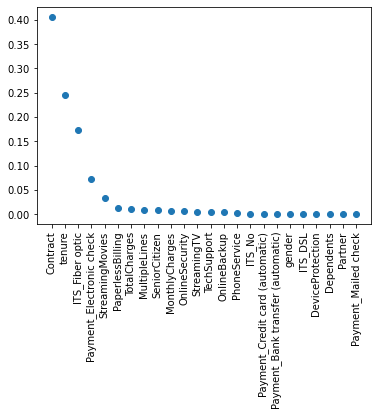

In [63]:
grdBoost = grid7
featureImp = pd.Series(grdBoost.best_estimator_.feature_importances_, index=X_train_full.columns).sort_values(ascending=False)
plt.plot(featureImp, 'o')
plt.xticks(rotation=90)
featureImp